In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import random
import mygene

In [2]:
old_db = '/Users/ndeveaux/Data/motifs/hg19_em.meme'
new_db = '/Users/ndeveaux/Dev/ThirdParty/gscripts/gscripts/pwm/hg19_2016_manually_touched_up.meme'

In [3]:
def parse_meme_file(file_name):
    tf_ensembl_ids = {}
    tf_motifs = {}
    with open(file_name) as f:
        current_motif = None
        current_tf = None
        current_lines = []
        try:
            for line in f.readlines():
                if line.startswith('MOTIF'):
                    if current_motif:
                        if current_tf not in tf_motifs.keys():
                            tf_motifs[current_tf] = {}
                        # save the values from the PWM into the dictionary
                        valid_lines = current_lines[2:-1] # lines in the pwm
                        tf_motifs[current_tf][current_motif] = ''.join(valid_lines).rstrip('\n')
                        current_lines = []
                    motif_info_line = line.rstrip().lstrip('MOTIF').split(' ')
                    current_motif = motif_info_line[1]
                    current_tf = motif_info_line[2] if len(motif_info_line) > 2 else 'UNKNOWN'
                    if len(motif_info_line) >= 4 and motif_info_line[3].startswith('ENS'):
                        tf_ensembl_ids[motif_info_line[3]] = current_tf
                    print current_motif
                else:
                    if current_motif:
                        current_lines.append(line)
        except Exception as e:
            print e
    return (tf_motifs, tf_ensembl_ids)

In [4]:
def parse_text_to_pwm(text):
    return np.array([[float(y) for y in (x.lstrip(' ').split())] for x in text.split('\n') if len(x.lstrip(' ').split()) == 4])

In [5]:
old_meme, x = parse_meme_file(old_db)
new_meme, ensembl_ids = parse_meme_file(new_db)

M0811_1.01
E10001
E10002
E10003
E10004
E10005
E10006
E10007
M5958_1.01
M2787_1.01
E10008
E10009
M5959_1.01
E10010
E10011
E10012
E10013
E10014
E10015
M2886_1.01
M5130_1.01
M5960_1.01
E10016
E10017
E10018
E10019
M5103_1.01
M5104_1.01
M5105_1.01
E10020
E10021
E10022
E10023
M5106_1.01
E10024
E10025
E10026
E10027
E10028
E10029
E10030
E10031
E10032
E10033
M1413_1.01
E10034
E10035
M5966_1.01
M5967_1.01
M0104_1.01
M0105_1.01
E10036
M0108_1.01
E10037
M3444_1.01
M5968_1.01
M1711_1.01
M5107_1.01
M5108_1.01
M5961_1.01
M5969_1.01
E10038
E10039
E10040
M0217_1.01
E10041
M5109_1.01
M5981_1.01
M2826_1.01
M2827_1.01
M5970_1.01
E10042
E10043
E10044
M5110_1.01
E10045
E10046
M0175_1.01
E10047
E10048
M5971_1.01
E10049
E10050
E10051
M2957_1.01
M2958_1.01
E10052
E10053
E10054
E10055
E10056
E10057
E10058
M4321_1.01
M4370_1.01
M4422_1.01
M4467_1.01
M5972_1.01
E10059
E10060
E10061
M5111_1.01
M5973_1.01
M2848_1.01
E10062
M5974_1.01
E10063
M5112_1.01
E10064
M0221_1.01
M4935_1.01
E10065
M2849_1.01
M5975_1.01
E10066

In [6]:
scatter_plot_index = set(new_meme.keys()).union(set(old_meme.keys()))
scatter_plot_index.remove('CTCF')

In [7]:
new_meme_count = {}
old_meme_count = {}
for i in scatter_plot_index:
    if i in new_meme.keys():
        new_meme_count[i] = len(new_meme[i])
    else:
        new_meme_count[i] = 0
    if i in old_meme.keys():
        old_meme_count[i] = len(old_meme[i])
    else:
        old_meme_count[i] = 0
        
        

In [8]:
diff_dict = {}
for i in scatter_plot_index:
    diff_dict[i] = new_meme_count[i] - old_meme_count[i]

In [9]:
df = pd.DataFrame(new_meme_count, ['new', 'old'])
df.loc['old',:] = old_meme_count

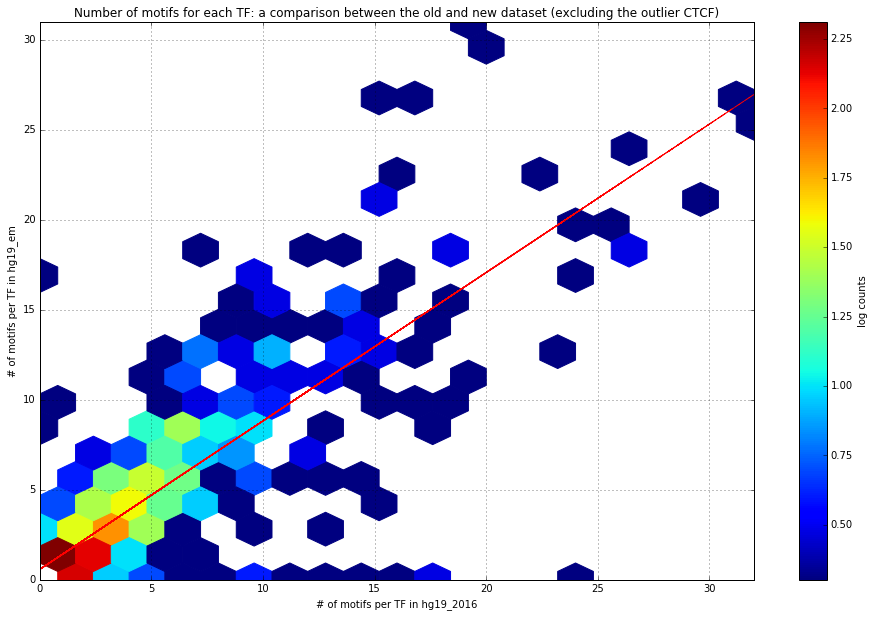

In [10]:
plt.figure(figsize=(16,10))
x = df.loc['new', :]
y =  df.loc['old', :]
fit = np.polyfit(x, y, 1)
fit_fn = np.poly1d(fit) 
plt.hexbin(x, y, gridsize=20, bins='log', mincnt=1)
plt.plot(x, fit_fn(x), color='red', linestyle='dashed')
plt.title('Number of motifs for each TF: a comparison between the old and new dataset (excluding the outlier CTCF)')
plt.grid()
# plt.plot(df.loc['new', :], df.loc['old', :], 'yo', df.loc['new', :], fit_fn(df.loc['new', :]), '--k')
plt.xlabel('# of motifs per TF in hg19_2016')
plt.ylabel('# of motifs per TF in hg19_em')
cb = plt.colorbar()
cb.set_label('log counts')

In [11]:
import operator
sorted_x = sorted(diff_dict.items(), key=operator.itemgetter(1), reverse=False)

In [12]:
sorted_x

[('UNKNOWN', -16),
 ('E2F1', -12),
 ('NFKB1', -12),
 ('TFAP2A', -11),
 ('FOS_JUN_JUND_JUNB_FOSB', -10),
 ('POU2F1', -10),
 ('HNF4A', -9),
 ('CREB1', -8),
 ('MYEF2', -8),
 ('SOX8', -8),
 ('ETS1', -7),
 ('SOX10', -7),
 ('FOXJ3', -6),
 ('SPDEF', -6),
 ('FOXC1', -6),
 ('NR2F1', -6),
 ('TBX21', -6),
 ('SRY', -6),
 ('TFAP2C', -6),
 ('BARHL2', -6),
 ('JDP2', -6),
 ('MAX', -5),
 ('FOXJ2', -5),
 ('GATA3', -5),
 ('NHLH1', -5),
 ('SOX9', -5),
 ('CEBPB', -5),
 ('RUNX1', -5),
 ('HLF', -4),
 ('RFX2', -4),
 ('TBP', -4),
 ('IRF1', -4),
 ('MYBL1', -4),
 ('FOXL1', -4),
 ('MEOX2', -4),
 ('FOXO4', -4),
 ('MYBL2', -4),
 ('UNCX', -4),
 ('MAFK', -4),
 ('HOXD13', -4),
 ('RHOXF1', -4),
 ('SOX1', -3),
 ('GATA1', -3),
 ('SOX14', -3),
 ('FOXC2', -3),
 ('HNF1A', -3),
 ('ERG', -3),
 ('E2F3', -3),
 ('E2F2', -3),
 ('SIX6', -3),
 ('BCLAF1', -3),
 ('RFX3', -3),
 ('EN1', -3),
 ('MGA', -3),
 ('IRF9', -3),
 ('FOXB1', -3),
 ('NFYA', -3),
 ('SOX7', -3),
 ('ALX1', -3),
 ('NR4A2', -3),
 ('TBX1', -3),
 ('TBX20', -3),
 ('RFX4',

In [13]:
len(set(new_meme.keys()))

943

In [14]:
unique_old_meme = dict(old_meme)
unique_new_meme = dict(new_meme)

In [15]:
motif_matrices = {}
for i in new_meme.keys():
    for j in new_meme[i].keys():
        if j in motif_matrices.keys():
            print j
        motif_matrices[j] = parse_text_to_pwm(new_meme[i][j])
for i in old_meme.keys():
    for j in old_meme[i].keys():
        if j in motif_matrices.keys():
            print j
        motif_matrices[j] = parse_text_to_pwm(old_meme[i][j])

In [16]:
def remove_duplicates(input_dict):
    threshold = 0.95
    duplicates = []
    for i in input_dict.keys():
        for j in input_dict.keys():
            if i != j:
                if len(motif_matrices[i]) == len(motif_matrices[j]):
                    corrcoef = np.corrcoef(motif_matrices[i].flatten(), motif_matrices[j].flatten())
                    if corrcoef[0][1] > threshold:
                        print 'Found correlation coefficient higher than {}, {}, at {} and {}'.format(threshold, corrcoef, i, j)
                    duplicates.append((i, j))
    return duplicates

In [17]:
for i in unique_new_meme.keys():
    duplicates = remove_duplicates(new_meme[i])
    removed = []
    for (x, y) in duplicates:
        if not (x in removed or y in removed):
            remove = x if random.randint(1,2) == 1 else y
            removed.append(remove)
            del unique_new_meme[i][remove]
for i in unique_old_meme.keys():
    duplicates = remove_duplicates(unique_old_meme[i])
    removed = []
    for (x, y) in duplicates:
        if not (x in removed or y in removed):
            remove = x if random.randint(1,2) == 1 else y
            removed.append(remove)
            del unique_old_meme[i][remove]

            
        

Found correlation coefficient higher than 0.95, [[ 1.          0.99016543]
 [ 0.99016543  1.        ]], at M5564_1.02 and M5565_1.02
Found correlation coefficient higher than 0.95, [[ 1.          0.99016543]
 [ 0.99016543  1.        ]], at M5565_1.02 and M5564_1.02
Found correlation coefficient higher than 0.95, [[ 1.          0.95452251]
 [ 0.95452251  1.        ]], at M3896_1.02 and M6467_1.02
Found correlation coefficient higher than 0.95, [[ 1.          0.95452251]
 [ 0.95452251  1.        ]], at M6467_1.02 and M3896_1.02
Found correlation coefficient higher than 0.95, [[ 1.          0.99177669]
 [ 0.99177669  1.        ]], at M5566_1.02 and M3445_1.02
Found correlation coefficient higher than 0.95, [[ 1.          0.99177669]
 [ 0.99177669  1.        ]], at M3445_1.02 and M5566_1.02
Found correlation coefficient higher than 0.95, [[ 1.          0.99719241]
 [ 0.99719241  1.        ]], at M3507_1.02 and M3508_1.02
Found correlation coefficient higher than 0.95, [[ 1.          0.9971

In [18]:
sum([len(unique_new_meme[x].keys()) for x in unique_new_meme.keys()])

2652

In [19]:
unique_new_meme_count = {}
unique_old_meme_count = {}
for i in scatter_plot_index:
    if i in new_meme.keys():
        unique_new_meme_count[i] = len(new_meme[i])
    else:
        unique_new_meme_count[i] = 0
    if i in old_meme.keys():
        unique_old_meme_count[i] = len(old_meme[i])
    else:
        unique_old_meme_count[i] = 0
        
        

In [20]:
df = pd.DataFrame(unique_new_meme_count, ['new', 'old'])
df.loc['old',:] = unique_old_meme_count

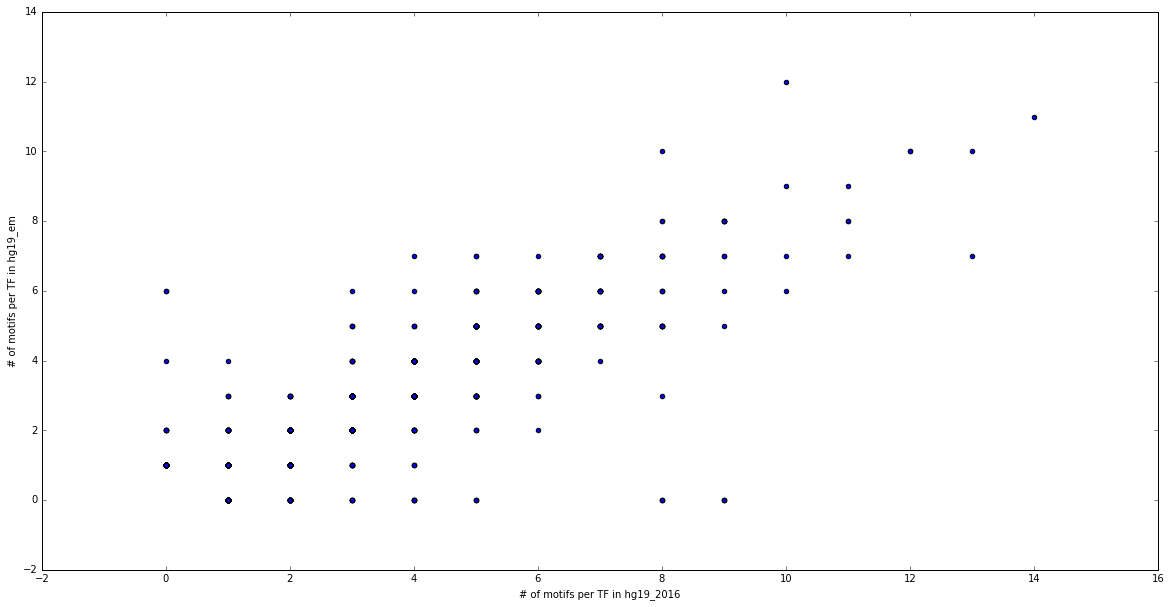

In [21]:
plt.figure(figsize=(20,10))
plt.scatter(df.loc['new', :], df.loc['old', :])
plt.xlabel('# of motifs per TF in hg19_2016')
plt.ylabel('# of motifs per TF in hg19_em')

## Compare against the mouse and human orthlog file

In [22]:
orthologs = pd.read_csv("/Users/ndeveaux/Dev/th17_jj_gsea/analysis/Genes/orthologs_hu2mu.txt", sep='\t')

In [23]:
 set(new_meme.keys()) - set(list(orthologs['Human'])) 

{'AC002126.6',
 'AC012531.1',
 'AC226150.2',
 'AHR::ARNT',
 'AHR::ARNT::HIF1A',
 'AL773544.1',
 'AL844527.7',
 'AP1',
 'AP3',
 'BCL',
 'C11orf9',
 'CACBP',
 'CACD',
 'CDX',
 'CGBP',
 'COMP1',
 'CPHX',
 'CR847794.3',
 'DDIT3::CEBPA',
 'DOBOX4',
 'DOBOX5',
 'DUX1',
 'DUX3',
 'DUX4',
 'E2F',
 'ENSG00000178604',
 'ENSG00000197025',
 'ENSG00000215754',
 'ENSG00000229544',
 'ENSG00000234254',
 'ENSG00000235187',
 'ENSG00000250542',
 'ENSG00000257482',
 'ENSG00000261932',
 'ENSG00000269523',
 'ETS',
 'EWSR1::FLI1',
 'FOX',
 'FOXA',
 'FOXE3',
 'GATA',
 'GLI',
 'GTF2A',
 'HAND1::TCFE2A',
 'HES4',
 'HF1H3B',
 'HIF1A::ARNT',
 'HNF1',
 'HNF4',
 'HSF',
 'IRF',
 'IRX5',
 'MEF2',
 'MEIS1::HOXA9',
 'MLL',
 'MTERF',
 'MYC::MAX',
 'MYCL1',
 'MYF',
 'NFAT',
 'NFE2L1::MAFG',
 'NFE4_HUMAN',
 'NFKB',
 'NFY',
 'NKX1-1',
 'NKX6-3',
 'NR1H',
 'NR1H2::RXRA',
 'NR4A',
 'OBOX1',
 'OBOX2',
 'OBOX3',
 'OBOX5',
 'OBOX6',
 'OTX',
 'PPARG::RXRA',
 'RAR',
 'RUNX',
 'SEF1',
 'SMAD',
 'SMARC',
 'SOHLH2',
 'SOX',
 'SREBP'

In [24]:
len(ensembl_ids.values())

850

In [25]:
mg = mygene.MyGeneInfo()
ginfo = mg.querymany(ensembl_ids.keys(), scopes='ensembl.gene')


querying 1-850...done.
Finished.
16 input query terms found no hit:
	[u'ENSG00000196409', u'ENSG00000234254', u'ENSG00000077809', u'ENSG00000235187', u'ENSG00000170616',
Pass "returnall=True" to return complete lists of duplicate or missing query terms.


In [26]:
ginfo

[{u'_id': u'135935',
  u'_score': 22.88293,
  u'entrezgene': 135935,
  u'name': u'NOBOX oogenesis homeobox',
  u'query': u'ENSG00000106410',
  u'symbol': u'NOBOX',
  u'taxid': 9606},
 {u'_id': u'3398',
  u'_score': 21.815262,
  u'entrezgene': 3398,
  u'name': u'inhibitor of DNA binding 2, HLH protein',
  u'query': u'ENSG00000115738',
  u'symbol': u'ID2',
  u'taxid': 9606},
 {u'_id': u'3202',
  u'_score': 22.254023,
  u'entrezgene': 3202,
  u'name': u'homeobox A5',
  u'query': u'ENSG00000106004',
  u'symbol': u'HOXA5',
  u'taxid': 9606},
 {u'_id': u'5467',
  u'_score': 22.254023,
  u'entrezgene': 5467,
  u'name': u'peroxisome proliferator activated receptor delta',
  u'query': u'ENSG00000112033',
  u'symbol': u'PPARD',
  u'taxid': 9606},
 {u'_id': u'3203',
  u'_score': 22.254417,
  u'entrezgene': 3203,
  u'name': u'homeobox A6',
  u'query': u'ENSG00000106006',
  u'symbol': u'HOXA6',
  u'taxid': 9606},
 {u'_id': u'503834',
  u'_score': 22.882494,
  u'entrezgene': 503834,
  u'name': u'div

In [27]:
ginfo[0]

{u'_id': u'135935',
 u'_score': 22.88293,
 u'entrezgene': 135935,
 u'name': u'NOBOX oogenesis homeobox',
 u'query': u'ENSG00000106410',
 u'symbol': u'NOBOX',
 u'taxid': 9606}

In [28]:
possible_meme_keys =  set(new_meme.keys())
total_hgnc_symbols = {}

In [29]:
for i in ginfo:
    if not i.has_key('notfound'):
        ens_id = i['query']
        old_symbol = ensembl_ids[i['query']]
        new_symbol = i[u'symbol']
        if not total_hgnc_symbols.has_key(ens_id):
            total_hgnc_symbols[ens_id] = set()
        total_hgnc_symbols[ens_id].add(old_symbol)
        total_hgnc_symbols[ens_id].add(new_symbol)
        if new_symbol in list(orthologs['Human']) and old_symbol not in list(orthologs['Human']):
            print '{} vs {}'.format(old_symbol, new_symbol)
            print 'substituted them'
            possible_meme_keys.add(new_symbol)
            possible_meme_keys.remove(old_symbol)

MYCL1 vs MYCL
substituted them
MTERF vs MTERF1
substituted them
CR847794.3 vs POU5F1
substituted them
AC012531.1 vs HOXC5
substituted them
AL844527.7 vs RXRB
substituted them
ZNF238 vs ZBTB18
substituted them
C11orf9 vs MYRF
substituted them
ZFP161 vs ZBTB14
substituted them
MLL vs KMT2A
substituted them
ENSG00000229544 vs NKX1-2
substituted them
ZNF187 vs ZSCAN26
substituted them
AC226150.2 vs ANHX
substituted them
AL773544.1 vs POU5F1
substituted them


In [30]:
for j in list(possible_meme_keys):
    if '::' in j or 'ENS' in j:
        possible_meme_keys.remove(j)

In [31]:
u'BORCS8-MEF2B' in possible_meme_keys

False

In [32]:
'ENSG00000064489' in ensembl_ids.keys()

True

In [33]:
possible_meme_keys - set(list(orthologs['Human'])) 

{'AC002126.6',
 'AP1',
 'AP3',
 'BCL',
 'CACBP',
 'CACD',
 'CDX',
 'CGBP',
 'COMP1',
 'CPHX',
 'DOBOX4',
 'DOBOX5',
 'DUX1',
 'DUX3',
 'DUX4',
 'E2F',
 'ETS',
 'FOX',
 'FOXA',
 'FOXE3',
 'GATA',
 'GLI',
 'GTF2A',
 'HES4',
 'HF1H3B',
 'HNF1',
 'HNF4',
 'HSF',
 'IRF',
 'IRX5',
 'MEF2',
 'MYF',
 'NFAT',
 'NFE4_HUMAN',
 'NFKB',
 'NFY',
 'NKX1-1',
 'NKX6-3',
 'NR1H',
 'NR4A',
 'OBOX1',
 'OBOX2',
 'OBOX3',
 'OBOX5',
 'OBOX6',
 'OTX',
 'RAR',
 'RUNX',
 'SEF1',
 'SMAD',
 'SMARC',
 'SOHLH2',
 'SOX',
 'SREBP',
 'STAT',
 'TATA',
 'TFAP2',
 'TFE',
 'ZNF271',
 'ZNF663',
 'ZNF702',
 'ZNF73',
 'ZNF75C',
 'ZNF834'}

In [34]:
'AC002126.6' in ensembl_ids.values()

True

In [35]:
total_hgnc_symbols

{u'ENSG00000001167': {'NFYA'},
 u'ENSG00000004848': {'ARX'},
 u'ENSG00000005073': {'HOXA11'},
 u'ENSG00000005102': {'MEOX1'},
 u'ENSG00000005513': {'SOX8'},
 u'ENSG00000005889': {'ZFX'},
 u'ENSG00000006047': {'YBX2'},
 u'ENSG00000006194': {'ZNF263'},
 u'ENSG00000006377': {'DLX6'},
 u'ENSG00000006468': {'ETV1'},
 u'ENSG00000006704': {'GTF2IRD1'},
 u'ENSG00000007372': {'PAX6'},
 u'ENSG00000007866': {'TEAD3'},
 u'ENSG00000007968': {'E2F2'},
 u'ENSG00000008196': {'TFAP2B'},
 u'ENSG00000008197': {'TFAP2D'},
 u'ENSG00000008441': {'NFIX'},
 u'ENSG00000009709': {'PAX7'},
 u'ENSG00000009950': {'MLXIPL'},
 u'ENSG00000010030': {'ETV7'},
 u'ENSG00000010818': {'HIVEP2'},
 u'ENSG00000012048': {'BRCA1'},
 u'ENSG00000012223': {'LTF'},
 u'ENSG00000012504': {'NR1H4'},
 u'ENSG00000016082': {'ISL1'},
 u'ENSG00000019549': {'SNAI2'},
 u'ENSG00000020633': {'RUNX3'},
 u'ENSG00000025156': {'HSF2'},
 u'ENSG00000025434': {'NR1H3'},
 u'ENSG00000028277': {'POU2F2'},
 u'ENSG00000029153': {'ARNTL2'},
 u'ENSG00000029

In [36]:
for j in total_hgnc_symbols.keys():
    count = 0
    for i in list(total_hgnc_symbols[j]):
        if i in possible_meme_keys:
            count += 1
        if count > 1:
            import pdb; pdb.set_trace()
            

> <ipython-input-36-52ab0b0a45ed>(3)<module>()
-> for i in list(total_hgnc_symbols[j]):
(Pdb) q


BdbQuit: 

In [ ]:
'NFE4' in possible_meme_keys

In [55]:
goa_tfs = pd.read_csv('/Users/ndeveaux/Data/Human_DNA_binding_proteins/human_tf_list_from_goa_2016_10_17.txt', index_col=0)


In [56]:
goa_tfs.index

Index([u'A0A0U1RRH7', u'A0A1B0GW55', u'ABI2', u'ABL1', u'ABT1', u'ACR',
       u'ADAR', u'ADNP', u'ADNP2', u'AGFG1',
       ...
       u'ZNF93', u'ZNF99', u'ZSCAN1', u'ZSCAN18', u'ZSCAN29', u'ZSCAN32',
       u'ZSCAN5A', u'ZSCAN5B', u'ZZZ3', u'hCG_2039718'],
      dtype='object', name=u'A0A0C4DFX4', length=1410)

In [ ]:
len(set(tfs.index)- set(list(orthologs['Human'])))

In [ ]:
len(set(tfs.index)- (possible_meme_keys- set(list(orthologs['Human']))))

In [ ]:
set(possible_meme_keys- set(list(orthologs['Human']))) - set(tfs.index)

In [ ]:
len(set(tfs.index) - possible_meme_keys)

In [ ]:
len(set(tfs.index) - set([item for sublist in total_hgnc_symbols.values() for item in sublist]))

In [ ]:
set([item for sublist in total_hgnc_symbols.values() for item in sublist])

In [ ]:
len(possible_meme_keys)

In [ ]:
dropped_tfs = set(new_meme.keys()) - set(old_meme.keys())

In [ ]:
'ATF6' in old_meme.keys()

In [ ]:
dropped_tfs.intersection(set(tfs.index))

In [ ]:
[j for j in tfs.index if j.startswith('GTF2A')]

In [65]:
g = pd.read_csv("/Users/ndeveaux/Data/Human_DNA_binding_proteins/human_hgall_tf_list_from_tfclass_2016_10_17.txt")
tf_class_tfs = [x.rstrip('\t') for x in list(g['HumanTF\tMouseTF'])]

In [66]:
tf_class_tfs = [x.rstrip('\t') for x in list(g['HumanTF\tMouseTF'])]

In [67]:
len(tf_class_tfs)

1549

In [63]:
len(set(goa_tfs.index) - set(tf_class_tfs))

635

In [48]:
tfs.index

Index([u'A0A0U1RRH7', u'A0A1B0GW55', u'ABI2', u'ABL1', u'ABT1', u'ACR',
       u'ADAR', u'ADNP', u'ADNP2', u'AGFG1',
       ...
       u'ZNF93', u'ZNF99', u'ZSCAN1', u'ZSCAN18', u'ZSCAN29', u'ZSCAN32',
       u'ZSCAN5A', u'ZSCAN5B', u'ZZZ3', u'hCG_2039718'],
      dtype='object', name=u'A0A0C4DFX4', length=1410)

In [68]:
len(set(tf_class_tfs) - set(goa_tfs.index))

774

In [69]:
possible_human_tfs = set(tf_class_tfs).union(set(tfs.index))

In [70]:
len(possible_human_tfs)

2184

In [71]:
possible_human_tfs

{'HIF3A',
 'HIST1H4A',
 'HIST1H4G',
 'RNF11',
 'ZBTB8A',
 'EXO5',
 'DCANP1',
 'ZNF709',
 'ZNF708',
 'ZNF879',
 'ZNF878',
 'A0A1B0GW55',
 'NR0B2',
 'NR0B1',
 'ZNF700',
 'ZNF707',
 'MEIS3P2',
 'MEIS3P1',
 'IRX5',
 'IRX4',
 'IRX6',
 'IRX1',
 'IRX3',
 'IRX2',
 'FOXQ1',
 'SP9',
 'ZNF45',
 'ZNF44',
 'ZNF43',
 'GSC2',
 'ZNF41',
 'SP1',
 'SP2',
 'SP3',
 'SP4',
 'SP5',
 'SP6',
 'SP7',
 'ZNF677',
 'ZNF676',
 'ZNF675',
 'ZNF674',
 'ZNF672',
 'ZNF671',
 'ZNF670',
 'MAX',
 'MAZ',
 'ZNF679',
 'ZNF678',
 'MYRFL',
 'MAF',
 'TSG101',
 'DENND4A',
 'SWAP70',
 'ZNF451',
 'CSDE1',
 'ZNF454',
 'BACH2',
 'BACH1',
 'FBXL11',
 'FBXL19',
 'KCNIP3',
 'DNASE1L1',
 'DNASE1L2',
 'DNASE1L3',
 'LIN28B',
 'LIN28A',
 'ZNF408',
 'OTUD7B',
 'ZEB1',
 'ZEB2',
 'HLX',
 'TOP1',
 'HLF',
 'ZNF296',
 'FOXC2',
 'FOXC1',
 'ZNF292',
 'SMAD9',
 'TRERF1',
 'SMAD4',
 'SMAD5',
 'SMAD6',
 'SMAD7',
 'SMAD1',
 'SMAD2',
 'SMAD3',
 'MUS81',
 'FOXM1',
 'ELMSAN1',
 'DRAP1',
 'TCEA2',
 'TCEA3',
 'TCEA1',
 'BARX2',
 'KDM2A',
 'BARX1',
 'RDM1',